In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
%matplotlib inline

In [24]:
df_wine = pd.read_csv('data\wine_quality\winequality-red.csv', sep = ';')

In [25]:
# get basic features of data(types, num_of_nulls)
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [26]:
# get basic stats of inputs and output
in_out_columns = df_wine.columns[1:]
df_wine[in_out_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000
alcohol,1599.0,10.422983,1.065668,8.40000,9.5000,10.20000,11.100000,14.90000


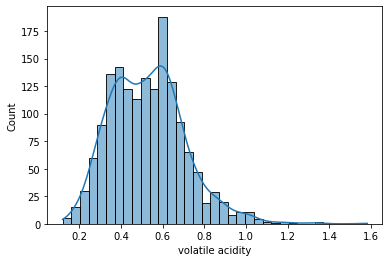

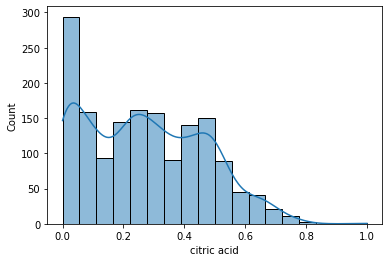

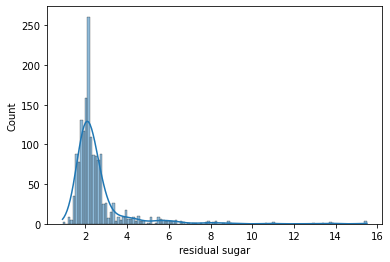

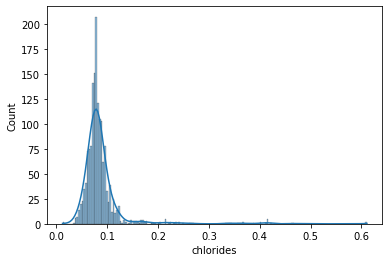

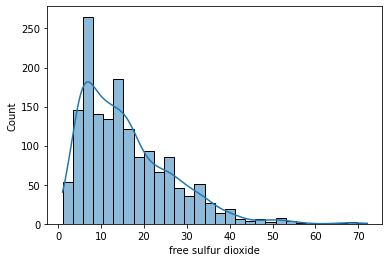

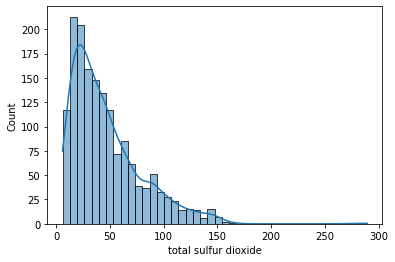

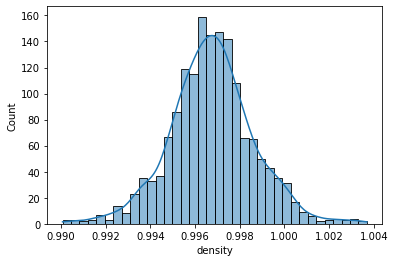

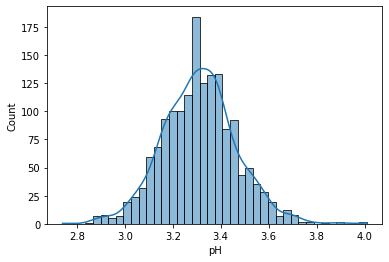

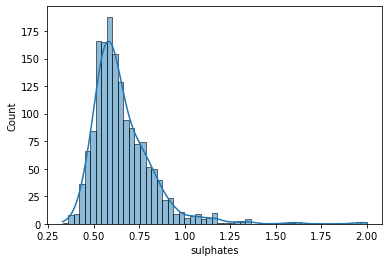

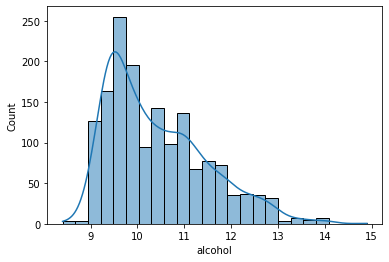

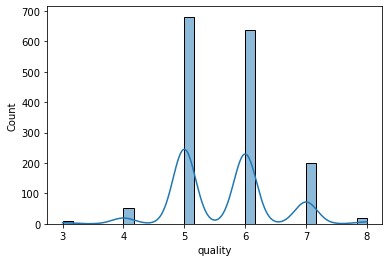

In [27]:
# show distributions
for item in in_out_columns:
    plt.figure()
    sns.histplot(df_wine[item], kde = True)

In [28]:
# count of zeros
{item: (sum(df_wine[item]==0.0), sum(df_wine[item]==0.0)/len(df_wine[item])) for item in in_out_columns}

{'volatile acidity': (0, 0.0),
 'citric acid': (132, 0.0825515947467167),
 'residual sugar': (0, 0.0),
 'chlorides': (0, 0.0),
 'free sulfur dioxide': (0, 0.0),
 'total sulfur dioxide': (0, 0.0),
 'density': (0, 0.0),
 'pH': (0, 0.0),
 'sulphates': (0, 0.0),
 'alcohol': (0, 0.0),
 'quality': (0, 0.0)}

In [29]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_wine[['quality']]).toarray())
df_wine = df_wine.join(enc_df)

In [30]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,0,1,2,3,4,5
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.0,0.0,1.0,0.0,0.0,0.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.0,0.0,1.0,0.0,0.0,0.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.0,0.0,1.0,0.0,0.0,0.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.0,0.0,0.0,1.0,0.0,0.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.0,0.0,1.0,0.0,0.0,0.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0.0,0.0,0.0,1.0,0.0,0.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0.0,0.0,0.0,1.0,0.0,0.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
X = df_wine.iloc[:,:11].values
Y = df_wine.iloc[:,12:18].values

In [32]:
X[0]

array([ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
        0.9978,  3.51  ,  0.56  ,  9.4   ])

In [33]:
Y[0]

array([0., 0., 1., 0., 0., 0.])

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33, random_state=0)

In [35]:
#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [36]:
X_train

array([[ 3.79780175, -1.73659008,  0.8570712 , ..., -1.55136219,
         1.01399624, -1.14014938],
       [-0.36423038, -1.46457323,  0.14233674, ..., -0.12478467,
        -1.08185338,  0.35801792],
       [ 2.60050484, -0.97494291,  1.1123335 , ..., -0.70838456,
        -0.00560628,  1.4816434 ],
       ...,
       [-0.2502021 ,  0.2219312 ,  0.1933892 , ..., -0.12478467,
         0.16432747, -0.85924301],
       [ 2.65751898, -0.32210249,  1.1123335 , ..., -0.05994023,
         0.10768289,  2.13709159],
       [ 0.83306653,  2.45246933,  0.24444166, ..., -0.3841624 ,
        -1.0252088 , -0.95287847]])

In [37]:
model = Sequential()

model.add(Dense(64,activation = 'relu', input_dim = 11))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(6,activation = 'softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum= 0.9, nesterov=True)

In [38]:
model.compile(loss='categorical_crossentropy',optimizer =sgd, metrics = ['accuracy'])

In [39]:
model.fit(x_train,y_train,epochs=2000,batch_size=128)

Epoch 1/2000
9/9 [==============================] - 0s 1ms/step - loss: 5.6918 - accuracy: 0.3424
Epoch 2/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.3025 - accuracy: 0.3940
Epoch 3/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.2228 - accuracy: 0.4464
Epoch 4/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.1758 - accuracy: 0.4848
Epoch 5/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.1828 - accuracy: 0.4808
Epoch 6/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.1837 - accuracy: 0.4882
Epoch 7/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.1944 - accuracy: 0.4701
Epoch 8/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.1888 - accuracy: 0.4791
Epoch 9/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.1448 - accuracy: 0.4843
Epoch 10/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.1784 - accuracy: 0.4696
Epoch 11/2000
9/9 [

Epoch 83/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.1324 - accuracy: 0.5007
Epoch 84/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.0398 - accuracy: 0.5479
Epoch 85/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.0757 - accuracy: 0.5199
Epoch 86/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.1079 - accuracy: 0.5278
Epoch 87/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.0508 - accuracy: 0.5592
Epoch 88/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.0667 - accuracy: 0.5310
Epoch 89/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.0814 - accuracy: 0.5350
Epoch 90/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.0352 - accuracy: 0.5499
Epoch 91/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.0323 - accuracy: 0.5221
Epoch 92/2000
9/9 [==============================] - 0s 1ms/step - loss: 1.0637 - accuracy: 0.5275
Epoch 93/2

9/9 [==============================] - 0s 2ms/step - loss: 0.9697 - accuracy: 0.5833
Epoch 166/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.0439 - accuracy: 0.5222
Epoch 167/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.9696 - accuracy: 0.5688
Epoch 168/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.9658 - accuracy: 0.5917
Epoch 169/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.9544 - accuracy: 0.5945
Epoch 170/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.9727 - accuracy: 0.5728
Epoch 171/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.9671 - accuracy: 0.5704
Epoch 172/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.9626 - accuracy: 0.5713
Epoch 173/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.9377 - accuracy: 0.6072
Epoch 174/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.9486 - accuracy: 0.5838
Epoch 175/2000


9/9 [==============================] - 0s 1ms/step - loss: 0.9357 - accuracy: 0.5866
Epoch 248/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.9289 - accuracy: 0.5835
Epoch 249/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.9755 - accuracy: 0.5465
Epoch 250/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.9320 - accuracy: 0.5925
Epoch 251/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.9147 - accuracy: 0.6095
Epoch 252/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.9235 - accuracy: 0.5937
Epoch 253/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.9226 - accuracy: 0.5813
Epoch 254/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.9588 - accuracy: 0.5694
Epoch 255/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.8890 - accuracy: 0.6010
Epoch 256/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.9376 - accuracy: 0.5838
Epoch 257/2000


9/9 [==============================] - 0s 2ms/step - loss: 0.8576 - accuracy: 0.6230
Epoch 329/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.8532 - accuracy: 0.6243
Epoch 330/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.8904 - accuracy: 0.6013
Epoch 331/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.8355 - accuracy: 0.6406
Epoch 332/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.8748 - accuracy: 0.6213
Epoch 333/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.8899 - accuracy: 0.6150
Epoch 334/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.8645 - accuracy: 0.6155
Epoch 335/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.8682 - accuracy: 0.6578
Epoch 336/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.9592 - accuracy: 0.5781
Epoch 337/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.8534 - accuracy: 0.6054
Epoch 338/2000


9/9 [==============================] - 0s 2ms/step - loss: 0.7720 - accuracy: 0.6607
Epoch 410/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.7816 - accuracy: 0.6601
Epoch 411/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.7577 - accuracy: 0.6627
Epoch 412/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.8347 - accuracy: 0.6351
Epoch 413/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.8748 - accuracy: 0.6296
Epoch 414/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.8118 - accuracy: 0.6426
Epoch 415/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.7644 - accuracy: 0.6712
Epoch 416/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.7753 - accuracy: 0.6702
Epoch 417/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.7832 - accuracy: 0.6631
Epoch 418/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.8057 - accuracy: 0.6402
Epoch 419/2000


9/9 [==============================] - 0s 2ms/step - loss: 0.8637 - accuracy: 0.6241
Epoch 492/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.7600 - accuracy: 0.6789
Epoch 493/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.8233 - accuracy: 0.6433
Epoch 494/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.7263 - accuracy: 0.6906
Epoch 495/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.7970 - accuracy: 0.6560
Epoch 496/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.6893
Epoch 497/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.7384 - accuracy: 0.6950
Epoch 498/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.6954
Epoch 499/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.9607 - accuracy: 0.5933
Epoch 500/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.7085 - accuracy: 0.7187
Epoch 501/2000


9/9 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6979
Epoch 574/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.7187
Epoch 575/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.7605 - accuracy: 0.6664
Epoch 576/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.7186
Epoch 577/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.6986
Epoch 578/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.7280 - accuracy: 0.6881
Epoch 579/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.7632
Epoch 580/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.7013
Epoch 581/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.7470
Epoch 582/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.7258
Epoch 583/2000


9/9 [==============================] - 0s 1ms/step - loss: 0.5811 - accuracy: 0.7367
Epoch 656/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.5904 - accuracy: 0.7603
Epoch 657/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.7441
Epoch 658/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.7666
Epoch 659/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.8697 - accuracy: 0.6572
Epoch 660/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.7372
Epoch 661/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.7640
Epoch 662/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.7206 - accuracy: 0.7056
Epoch 663/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.7771 - accuracy: 0.6627
Epoch 664/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.7027
Epoch 665/2000


9/9 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.7347
Epoch 738/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.8060
Epoch 739/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.5945 - accuracy: 0.7523
Epoch 740/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.7227
Epoch 741/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.7288
Epoch 742/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.7586
Epoch 743/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.7243 - accuracy: 0.6990
Epoch 744/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.5258 - accuracy: 0.7531
Epoch 745/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7990
Epoch 746/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.7521
Epoch 747/2000


9/9 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.7314
Epoch 819/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.8169
Epoch 820/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.7771
Epoch 821/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.6351 - accuracy: 0.7268
Epoch 822/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.8005
Epoch 823/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.8000
Epoch 824/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.7938
Epoch 825/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.8052
Epoch 826/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.8041
Epoch 827/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.7727
Epoch 828/2000


9/9 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8743
Epoch 901/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.0141 - accuracy: 0.6320
Epoch 902/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.8147
Epoch 903/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7853
Epoch 904/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8257
Epoch 905/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8293
Epoch 906/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.8105
Epoch 907/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.5568 - accuracy: 0.7685
Epoch 908/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3703 - accuracy: 0.8624
Epoch 909/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8447
Epoch 910/2000


9/9 [==============================] - 0s 2ms/step - loss: 0.3720 - accuracy: 0.8494
Epoch 982/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.8589
Epoch 983/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.7204 - accuracy: 0.7264
Epoch 984/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.7559
Epoch 985/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.7797 - accuracy: 0.7110
Epoch 986/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.7141
Epoch 987/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 0.8193
Epoch 988/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3693 - accuracy: 0.8356
Epoch 989/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3585 - accuracy: 0.8418
Epoch 990/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.7724
Epoch 991/2000


9/9 [==============================] - 0s 1ms/step - loss: 0.4815 - accuracy: 0.8080
Epoch 1062/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4366 - accuracy: 0.8242
Epoch 1063/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.8022
Epoch 1064/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.5196 - accuracy: 0.7880
Epoch 1065/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.8067
Epoch 1066/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8770
Epoch 1067/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8784
Epoch 1068/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.3295 - accuracy: 0.8615
Epoch 1069/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8319
Epoch 1070/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8249
Epoch 

9/9 [==============================] - 0s 1ms/step - loss: 0.2630 - accuracy: 0.9064
Epoch 1143/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8503
Epoch 1144/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.5323 - accuracy: 0.7872
Epoch 1145/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.8057
Epoch 1146/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.8425
Epoch 1147/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8798
Epoch 1148/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8449
Epoch 1149/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.2880 - accuracy: 0.8829
Epoch 1150/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2744 - accuracy: 0.8888
Epoch 1151/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8236
Epoch 

9/9 [==============================] - 0s 2ms/step - loss: 0.2476 - accuracy: 0.8988
Epoch 1224/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.8030
Epoch 1225/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.3107 - accuracy: 0.8715
Epoch 1226/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.2986 - accuracy: 0.8784
Epoch 1227/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.8523
Epoch 1228/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2411 - accuracy: 0.9009
Epoch 1229/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2734 - accuracy: 0.8938
Epoch 1230/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.8990
Epoch 1231/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.8517
Epoch 1232/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.9124
Epoch 

9/9 [==============================] - 0s 1ms/step - loss: 0.2073 - accuracy: 0.9225
Epoch 1305/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2358 - accuracy: 0.8991
Epoch 1306/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 0.8936
Epoch 1307/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2346 - accuracy: 0.8939
Epoch 1308/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2997 - accuracy: 0.8715
Epoch 1309/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9086
Epoch 1310/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.5578 - accuracy: 0.6232
Epoch 1311/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.7768
Epoch 1312/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3593 - accuracy: 0.8499
Epoch 1313/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.8407
Epoch 

9/9 [==============================] - 0s 2ms/step - loss: 0.1896 - accuracy: 0.9159
Epoch 1386/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.9052
Epoch 1387/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.9216
Epoch 1388/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1946 - accuracy: 0.9195
Epoch 1389/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1720 - accuracy: 0.9430
Epoch 1390/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9200
Epoch 1391/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2267 - accuracy: 0.9116
Epoch 1392/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2841 - accuracy: 0.8900
Epoch 1393/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3657 - accuracy: 0.8454
Epoch 1394/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.7301 - accuracy: 0.7601
Epoch 

9/9 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7981
Epoch 1466/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8491
Epoch 1467/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2627 - accuracy: 0.8886
Epoch 1468/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2651 - accuracy: 0.8895
Epoch 1469/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2782 - accuracy: 0.8848
Epoch 1470/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.8955
Epoch 1471/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1782 - accuracy: 0.9313
Epoch 1472/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1845 - accuracy: 0.9273
Epoch 1473/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.8867
Epoch 1474/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8485
Epoch 

9/9 [==============================] - 0s 1ms/step - loss: 0.2120 - accuracy: 0.9196
Epoch 1546/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.2066 - accuracy: 0.9170
Epoch 1547/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1794 - accuracy: 0.9253
Epoch 1548/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1383 - accuracy: 0.9537
Epoch 1549/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1908 - accuracy: 0.9210
Epoch 1550/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9264
Epoch 1551/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.1440 - accuracy: 0.7039
Epoch 1552/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.7742
Epoch 1553/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.8285
Epoch 1554/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8581
Epoch 

9/9 [==============================] - 0s 2ms/step - loss: 0.2697 - accuracy: 0.8939
Epoch 1626/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.9170 - accuracy: 0.7551
Epoch 1627/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.8346
Epoch 1628/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8425
Epoch 1629/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8605
Epoch 1630/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2926 - accuracy: 0.8969
Epoch 1631/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2475 - accuracy: 0.8940
Epoch 1632/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8934
Epoch 1633/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2280 - accuracy: 0.9100
Epoch 1634/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.7981
Epoch 

9/9 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.8801
Epoch 1707/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.2587 - accuracy: 0.9181
Epoch 1708/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.2293 - accuracy: 0.9048
Epoch 1709/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.9196
Epoch 1710/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.2765 - accuracy: 0.8797
Epoch 1711/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.2022 - accuracy: 0.9189
Epoch 1712/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.1617 - accuracy: 0.9340
Epoch 1713/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1349 - accuracy: 0.9597
Epoch 1714/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1314 - accuracy: 0.9470
Epoch 1715/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9345
Epoch 

9/9 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.9060
Epoch 1788/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1924 - accuracy: 0.9135
Epoch 1789/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.3072 - accuracy: 0.8846
Epoch 1790/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.9139
Epoch 1791/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9341
Epoch 1792/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.9196
Epoch 1793/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1398 - accuracy: 0.9397
Epoch 1794/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1354 - accuracy: 0.9410
Epoch 1795/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1222 - accuracy: 0.9583
Epoch 1796/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9289
Epoch 

9/9 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.7877
Epoch 1869/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.9099 - accuracy: 0.7525
Epoch 1870/2000
9/9 [==============================] - 0s 2ms/step - loss: 1.0228 - accuracy: 0.7521
Epoch 1871/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.8161 - accuracy: 0.7637
Epoch 1872/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8580
Epoch 1873/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8537
Epoch 1874/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8889
Epoch 1875/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8578
Epoch 1876/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.3593 - accuracy: 0.8636
Epoch 1877/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1861 - accuracy: 0.9205
Epoch 

9/9 [==============================] - 0s 1ms/step - loss: 0.9939 - accuracy: 0.7151
Epoch 1949/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.8442
Epoch 1950/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2626 - accuracy: 0.8969
Epoch 1951/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.2291 - accuracy: 0.9130
Epoch 1952/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.9124
Epoch 1953/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1293 - accuracy: 0.9512
Epoch 1954/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1237 - accuracy: 0.9585
Epoch 1955/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.9254
Epoch 1956/2000
9/9 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9620
Epoch 1957/2000
9/9 [==============================] - 0s 1ms/step - loss: 0.1204 - accuracy: 0.9552
Epoch 

In [40]:
score = model.evaluate(x_test, y_test, batch_size = 128)

5/5 [==============================] - 0s 4ms/step - loss: 3.8398 - accuracy: 0.5682


In [41]:
model.metrics_names

['loss', 'accuracy']

In [42]:
score

[3.839848756790161, 0.5681818127632141]

In [43]:
model.predict(X_train[0:3], batch_size = None, verbose = 0,steps=None )

array([[0.0000000e+00, 0.0000000e+00, 1.2309207e-21, 9.9999416e-01,
        5.8635073e-06, 1.6613632e-23],
       [9.2889438e-17, 1.1150128e-21, 2.9061201e-05, 9.8235184e-01,
        1.0877324e-02, 6.7417221e-03],
       [1.1871152e-27, 5.7408948e-25, 4.5502471e-05, 5.1472086e-01,
        4.8523360e-01, 2.9807823e-09]], dtype=float32)

In [44]:
y_train[0:3]

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])